In [1]:
# google colab only, install ocean-data-parser
%pip install git+https://github.com/cioos-siooc/ocean-data-parser.git@add-dfo-nl-p-file-parser

  Cloning https://github.com/cioos-siooc/ocean-data-parser.git (to revision add-dfo-nl-p-file-parser) to /tmp/pip-req-build-2uw_adzs
  Running command git clone --filter=blob:none --quiet https://github.com/cioos-siooc/ocean-data-parser.git /tmp/pip-req-build-2uw_adzs
  Running command git checkout -b add-dfo-nl-p-file-parser --track origin/add-dfo-nl-p-file-parser
  Switched to a new branch 'add-dfo-nl-p-file-parser'
  Branch 'add-dfo-nl-p-file-parser' set up to track remote branch 'add-dfo-nl-p-file-parser' from 'origin'.
  Resolved https://github.com/cioos-siooc/ocean-data-parser.git to commit 77a65a4940c0e97b6a757ebdb12078afdddaf290
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cioos-siooc/cioos-siooc_data_transform.git (to revision ios-parser-extra-vocabulary) to /tmp/pip-install-qidpyvja/cioos-data-transform_65dd4d684ae4498c862b5149877b82a0
  Running command git clone --filter=blob:none --quiet https://github.com/cioos-siooc/cioos-siooc_data_transform.git 

In [3]:
from ocean_data_parser.read.dfo.nafc import pfile
import requests

In [4]:
# Download example p-file from github tests
example_file_url = "https://raw.githubusercontent.com/cioos-siooc/ocean-data-parser/add-dfo-nl-p-file-parser/tests/parsers_test_files/dfo/odf/p/ctd/56001001.p2022"
pfile_name = example_file_url.split('/')[-1]
response = requests.get(example_file_url)
response.raise_for_status()
with open(pfile_name,'w') as file_handle:
    file_handle.write(response.text)

In [5]:
# Read p-file
ds = pfile(pfile_name)

# Show p-file xarray.Dataset object
ds

<xarray.Dataset>
Dimensions:    (index: 2214)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 6 ... 2208 2209 2210 2211 2212 2213
    time       datetime64[ns] 2022-04-10T14:06:00
    latitude   float64 47.55
    longitude  float64 -51.41
Data variables: (12/15)
    scan       (index) int64 2 5 8 11 14 17 ... 10444 10447 10450 10453 10458
    PRESPR01   (index) float64 5.829 5.862 5.892 5.924 ... 171.6 171.7 171.7
    TEMPS901   (index) float64 0.5384 0.5385 0.5393 ... 0.4747 0.4747 0.4747
    CNDCST01   (index) float64 2.714 2.714 2.714 2.715 ... 2.806 2.806 2.806
    PSALST01   (index) float64 31.92 31.92 31.92 31.92 ... 33.09 33.09 33.09
    SIGTEQST   (index) float64 25.6 25.6 25.6 25.6 ... 26.54 26.54 26.54 26.54
    ...         ...
    PHXXZZXX   (index) float64 8.343 8.341 8.341 8.343 ... 8.275 8.275 8.275
    OPTCPS01   (index) float64 96.65 96.66 96.65 96.65 ... 96.25 96.25 96.25
    ATTNZS01   (index) float64 0.1364 0.1361 0.1364 ... 0.1529 0.1529 0.1529
    CCOMD002   (index) float64 0.2455 0.2455 0.2455 ... 0.7799 0.7388 0.7388
    depth      (index) float64 5.78 5.813 5.843 5.874 ... 170.1 170.1 170.2
    DOXYZZ01   (index) float64 8.175 8.175 8.179 8.18 ... 6.996 6.996 6.997
Attributes: (12/61)
    sdn_platform_urn:              SDN:C17::33AT
    platform_name:                 Atlantis
    platform_owner:                U.S. Navy
    platform_type:                 Research Vessel
    country_of_origin:             United States
    ices_platform_codes:           33AT
    ...                            ...
    time:                          2022-04-10T14:06:00Z
    trip:                          1
    waves_height:                  1
    waves_period:                  8
    wind_dir:                      80
    wind_speed_knots:              2

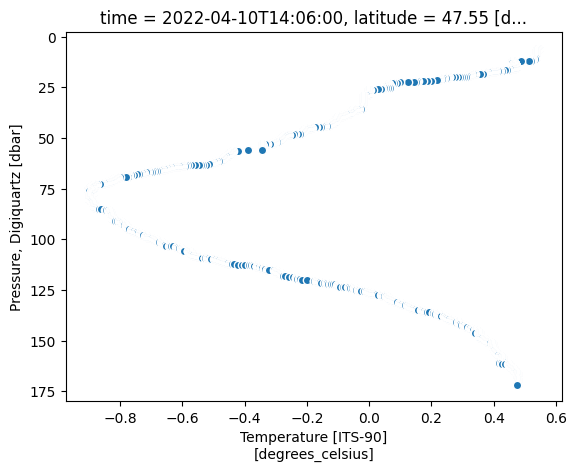

In [6]:
# Plots
ds.plot.scatter(x='TEMPS901',y='PRESPR01',yincrease=False)

In [7]:
# Save to NetCDF
ds.to_netcdf(pfile_name + '.nc')